# depedencies

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow=="2.13.0"

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.13.0
  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.13.0 which is incompatible.


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np
import os
import shutil
import kerastuner as kt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

<ipython-input-4-7b2e836e41f2>:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
!pip install tflite-support-nightly

In [ ]:
from tflite_support import metadata_schema_py_generated as _metadata_fb
import flatbuffers

from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata

In [ ]:
!pip install keras-tuner

#import data

In [ ]:
!gdown --id '1Dl77WvybHkRDJSzVb-huLk4muvelUDlf'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Dl77WvybHkRDJSzVb-huLk4muvelUDlf
From (redirected): https://drive.google.com/uc?id=1Dl77WvybHkRDJSzVb-huLk4muvelUDlf&confirm=t&uuid=88b65167-3e7d-4a93-b59d-0152b1900848
To: /content/31foods_new.zip
100% 142M/142M [00:02<00:00, 65.2MB/s]


In [ ]:
!ls

31foods_new.zip  sample_data


In [ ]:
!unzip '31foods_new.zip'

Archive:  31foods_new.zip
   creating: 31foods_new/
  inflating: 31foods_new/README.dataset.txt  
  inflating: 31foods_new/README.roboflow.txt  
   creating: 31foods_new/test/
   creating: 31foods_new/test/01. Ayam Betutu/
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-13_jpg.rf.1a2a63e3c0a93c1b1f3dc729e92c9c93.jpg  
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-16_jpg.rf.5a3e7260bd2cbfb9412a2f9ca21f5b4a.jpg  
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-19_jpg.rf.41b222683e973521da081b8d68180f81.jpg  
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-1_jpg.rf.1267cd873b6994302869bef94d00dc86.jpg  
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-23_jpg.rf.f22f3228bb16c7929278c566e1ca9613.jpg  
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-40_jpg.rf.ce22638217224a76ae488d97b575bb9b.jpg  
  inflating: 31foods_new/test/01. Ayam Betutu/Ayam-Betutu-42_jpg.rf.f2764c24d5ec64ce53d5f26fd050e456.jpg  
  inflating: 31foods_new/test

In [ ]:
base_dir = '/content/31foods_new'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok = True)
os.makedirs(val_dir, exist_ok = True)
os.makedirs(test_dir, exist_ok = True)

source_dirs = ['/train', '/train', '/valid']

source_dirs = {
    'train': os.path.join(base_dir, 'train'),
    'valid': os.path.join(base_dir, 'valid'),
    'test': os.path.join(base_dir, 'test')
}

# Move the directories
for key, value in source_dirs.items():
    if key == 'train':
        shutil.move(value, train_dir)
    elif key == 'valid':
        shutil.move(value, val_dir)
    else:
        shutil.move(value, test_dir)

#prepos

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True, #nambah vertical flip
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 3225 images belonging to 31 classes.
Found 764 images belonging to 31 classes.
Found 564 images belonging to 31 classes.


In [ ]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}

for class_index, class_name in class_labels.items():
    print(f"Class {class_index}: {class_name}")

Class 0: 01. Ayam Betutu
Class 1: 02. Beberuk Terong
Class 2: 03. Coto Makassar
Class 3: 04. Gudeg
Class 4: 05. Kerak Telor
Class 5: 06. Mie Aceh
Class 6: 07. Nasi Kuning
Class 7: 08. Nasi Pecel
Class 8: 09. Papeda
Class 9: 10. Pempek
Class 10: 11. Peuyeum
Class 11: 12. Rawon
Class 12: 13. Rendang
Class 13: 14. Sate Madura
Class 14: 15. Serabi
Class 15: 16. Soto Banjar
Class 16: 17. Soto Lamongan
Class 17: 18. Tahu Sumedang
Class 18: 19. Bakso
Class 19: 20. Bebek_betutu
Class 20: 21. Gado_gado
Class 21: 22. Nasi_goreng
Class 22: 23. Batagor
Class 23: 24. ayam_goreng
Class 24: 25. ayam_pop
Class 25: 26. dendeng_batokok
Class 26: 27. gulai_ikan
Class 27: 28. gulai_tambusu
Class 28: 29. gulai_tunjang
Class 29: 30. telur_balado
Class 30: 31. telur_dadar


In [ ]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Mengubah label kelas
class_labels[0] = "Ayam Betutu"
class_labels[1] = "Beberuk Terong"
class_labels[2] = "Coto Makassar"
class_labels[3] = "Gudeg"
class_labels[4] = "Kerak Telor"
class_labels[5] = "Mie Aceh"
class_labels[6] = "Nasi Kuning"
class_labels[7] = "Nasi Pecel"
class_labels[8] = "Papeda"
class_labels[9] = "Pempek"
class_labels[10] = "Peuyeum"
class_labels[11] = "Rawon"
class_labels[12] = "Rendang"
class_labels[13] = "Sate Madura"
class_labels[14] = "Serabi"
class_labels[15] = "Soto Banjar"
class_labels[16] = "Soto Lamongan"
class_labels[17] = "Tahu Sumedang"
class_labels[18] = "Bakso"
class_labels[19] = "Bebek Betutu"
class_labels[20] = "Gado-gado"
class_labels[21] = "Nasi Goreng"
class_labels[22] = "Batagor"
class_labels[23] = "Ayam Goreng"
class_labels[24] = "Ayam Pop"
class_labels[25] = "Dendeng Batotok"
class_labels[26] = "Gulai Ikan"
class_labels[27] = "Gulai Tambusu"
class_labels[28] = "Gulai Tunjang"
class_labels[29] = "Telur Balado"
class_labels[30] = "Telur Dadar"

# Menyimpan label kelas yang diubah ke file teks
# with open('class_labels.txt', 'w') as file:
#     for idx, label in class_labels.items():
#         file.write(f"{idx}: {label}\n")

for class_index, class_name in class_labels.items():
    print(f"Class {class_index}:{class_name}")

Class 0:Ayam Betutu
Class 1:Beberuk Terong
Class 2:Coto Makassar
Class 3:Gudeg
Class 4:Kerak Telor
Class 5:Mie Aceh
Class 6:Nasi Kuning
Class 7:Nasi Pecel
Class 8:Papeda
Class 9:Pempek
Class 10:Peuyeum
Class 11:Rawon
Class 12:Rendang
Class 13:Sate Madura
Class 14:Serabi
Class 15:Soto Banjar
Class 16:Soto Lamongan
Class 17:Tahu Sumedang
Class 18:Bakso
Class 19:Bebek Betutu
Class 20:Gado-gado
Class 21:Nasi Goreng
Class 22:Batagor
Class 23:Ayam Goreng
Class 24:Ayam Pop
Class 25:Dendeng Batotok
Class 26:Gulai Ikan
Class 27:Gulai Tambusu
Class 28:Gulai Tunjang
Class 29:Telur Balado
Class 30:Telur Dadar


#model

In [ ]:
def build_model(hp):
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    for layer in base_model.layers[:-20]:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(
        units=256,
        kernel_initializer='he_normal',
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2', values=[1e-4, 1e-3, 1e-2])),
        bias_regularizer=l2(hp.Choice('l2', values=[1e-4, 1e-3, 1e-2]))
    )(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1))(x)

    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Define the scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
tuner.search(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5),
        ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
        LearningRateScheduler(scheduler)
    ]
)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

Trial 5 Complete [01h 24m 17s]
val_accuracy: 0.8167539238929749

Best val_accuracy So Far: 0.8416230082511902
Total elapsed time: 06h 57m 45s


#train best model

In [ ]:
# Menyimpan label kelas pada model
model.class_labels = class_labels

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5),
        ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
        LearningRateScheduler(scheduler)
    ]
)

Epoch 1/25
101/101 [==============================] - 195s 2s/step - loss: 1.8335 - accuracy: 0.5309 - val_loss: 1.1290 - val_accuracy: 0.7120 - lr: 0.0100
Epoch 2/25
101/101 [==============================] - 211s 2s/step - loss: 1.2490 - accuracy: 0.6828 - val_loss: 1.2657 - val_accuracy: 0.7042 - lr: 0.0100
Epoch 3/25
101/101 [==============================] - 192s 2s/step - loss: 1.2331 - accuracy: 0.6995 - val_loss: 1.3595 - val_accuracy: 0.7029 - lr: 0.0100
Epoch 4/25
101/101 [==============================] - 208s 2s/step - loss: 1.2000 - accuracy: 0.7194 - val_loss: 1.8824 - val_accuracy: 0.5955 - lr: 0.0100
Epoch 5/25
101/101 [==============================] - 191s 2s/step - loss: 1.1803 - accuracy: 0.7333 - val_loss: 1.0280 - val_accuracy: 0.7893 - lr: 0.0100
Epoch 6/25
101/101 [==============================] - 193s 2s/step - loss: 1.1303 - accuracy: 0.7501 - val_loss: 0.9768 - val_accuracy: 0.7958 - lr: 0.0100
Epoch 7/25
101/101 [==============================] - 194s 2s/st

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

36/36 [==============================] - 18s 498ms/step - loss: 0.9843 - accuracy: 0.7943
Test Loss: 0.9843142628669739
Test Accuracy: 0.7943262457847595


1/1 [==============================] - 1s 551ms/step


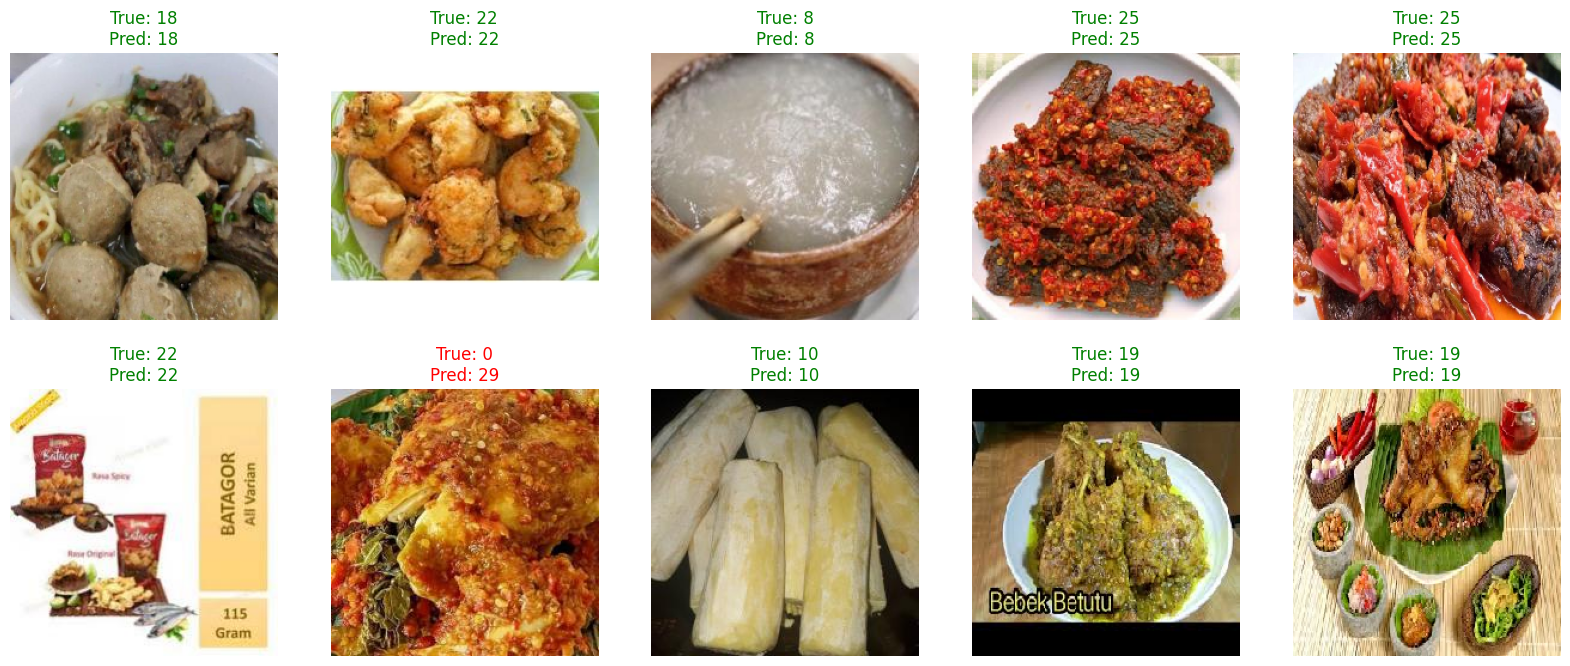

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels_multilabel = next(test_generator)
test_labels = np.argmax(test_labels_multilabel, axis=1)

# Melakukan prediksi
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Membuat gambar baru
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

# Menampilkan gambar dan label
for i, ax in enumerate(axes):
    img = test_images[i]
    ax.imshow(img)
    ax.set_title(f"True: {test_labels[i]}\nPred: {pred_labels[i]}", color="green" if test_labels[i] == pred_labels[i] else "red", fontsize=12)
    ax.axis("off")

plt.show()

36/36 [==============================] - 33s 936ms/step


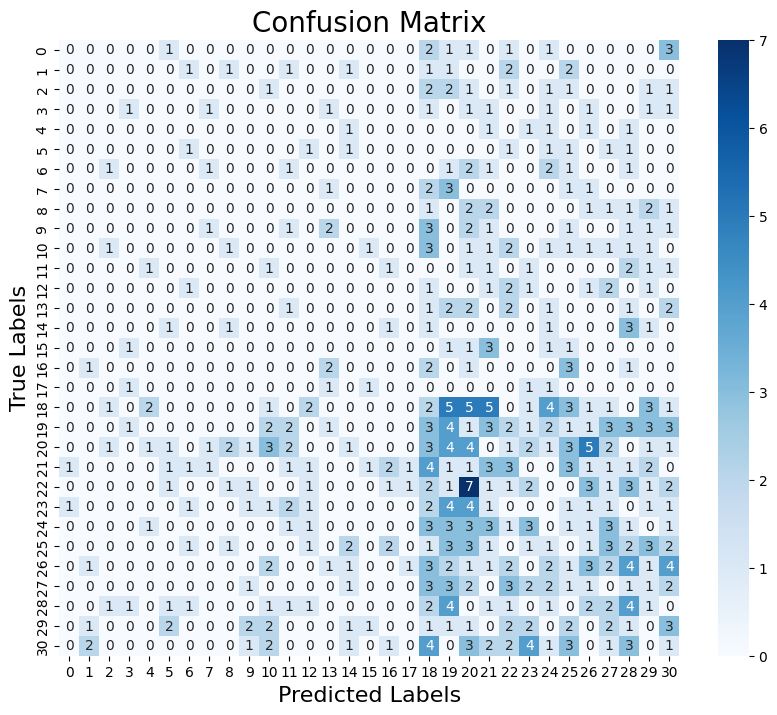

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil label true dan label prediksi
true_labels = test_generator.classes
pred_labels = model.predict(test_generator)
pred_labels = np.argmax(pred_labels, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.show()

#test the model

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Memuat gambar
def load_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img_array = load_image(path, target_size=(224, 224))

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Mengambil label kelas dari class_labels
    # class_labels = {v: k for k, v in train_generator.class_indices.items()}
    predicted_label = class_labels[predicted_class]

    print(f"File: {fn}")
    print(f"Prediksi: {predicted_label}")
    print("Probabilitas:", predictions[0])
    print("-" * 30)

Saving rendang.jpg to rendang (6).jpg
1/1 [==============================] - 1s 1s/step
File: rendang (6).jpg
Prediksi: 20. Bebek_betutu
Probabilitas: [4.8905751e-04 2.9143488e-05 6.3868612e-04 3.1695554e-03 1.6865132e-03
 8.4931817e-05 9.3560043e-04 2.2558347e-04 2.7047618e-05 2.3535553e-05
 3.1486630e-05 1.5815375e-03 3.3876106e-01 7.6212845e-04 7.6624128e-05
 1.2091691e-05 9.8068267e-05 3.4117682e-05 1.7646132e-02 3.7431049e-01
 3.5881340e-03 5.9799887e-02 8.2955121e-05 4.9467119e-03 1.3902076e-03
 1.8775134e-01 5.1825837e-04 5.6972964e-05 6.2690972e-04 5.4762076e-04
 6.7610759e-05]
------------------------------


#save model

In [ ]:
model.save('mobilenet3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#tflite

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_path = "modelbisa.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

In [ ]:
import json

class_descriptions = {
    'Ayam Betutu'     : "test1",
    'Beberuk Terong'  : "test2",
    'Coto Makassar'   : "test3",
    'Gudeg'           : "test1",
    'Kerak Telor'     : "test1",
    'Mie Aceh'        : "test1",
    'Nasi Kuning'       : "test1",
    'Nasi Pecel'        : "test1",
    'Papeda'            : "test1",
    'Pempek'            : "test1",
    'Peuyeum '          : "test1",
    'Rawon'             : "test1",
    'Rendang'           : "test1",
    'Sate Madura'       : "test1",
    'Serabi'            : "test1",
    'Soto Banjar'       : "test1",
    'Soto Lamongan'     : "test1",
    'Tahu Sumedang'     : "test1",
    'Bakso'             : "test1",
    'Bebek Betutu'      : "test1",
    'Gado-gado'        : "test1",
    'Nasi Goreng'       : "test1",
    'Batagor'           : "test1",
    'Ayam Goreng'       : "test1",
    'Ayam Pop'          : "test1",
    # 'Daging Rendang'    : "test1",
    'Dendeng Batokok'   : "test1",
    'Gulai Ikan'       : "test1",
    'Gulai Tambusu'     : "test1",
    'Gulai Tunjang'    : "test1",
    'Telur Balado'      : "test1",
    'Telur Dadar'       : "test1",
}

with open('class_descriptions.json', 'w') as json_file:
    json.dump(class_descriptions, json_file, indent=4)

In [ ]:
# Define the file paths and parameters
_MODEL_PATH = "modelbisa.tflite"  # The path to your TFLite model
_LABEL_FILE = "class_descriptions.json"  # The path to your label file
_SAVE_TO_PATH = "model_with_metadata.tflite"  # The path to save the TFLite model with metadata
_INPUT_NORM_MEAN = 0.0  # The mean value used for input normalization
_INPUT_NORM_STD = 1.0  # The standard deviation used for input normalization

# Create the metadata writer
writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by the metadata writer
print(writer.get_metadata_json())

# Populate the metadata into the model
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

# Verify the populated metadata in the model
displayer = metadata.MetadataDisplayer.with_model_file(_SAVE_TO_PATH)
print(displayer.get_metadata_json())


{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  0.0
                ],
                "std": [
                  1.0
                ]
              }
            }
          ],
          "stats": {
            "max": [
              255.0
            ],
            "min": [
              0.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "probabil